In [1]:
#La fonction train_test_split divise notre jeu de données en 4 parties
#test_size : définit le pourcentage que vous souhaitez pour le test, dans notre cas 0,2 signifie 20 % pour les tests et 80 % pour la formation.

#Random_state : le nombre random_state divise les jeux de données de test et d'apprentissage de manière aléatoire.
#Régression d'apprentissage supervisé
#En régression :

#La variable de sortie est une valeur continue .

#La variable d'entrée est une valeur continue .

#La fonction de mappage est une fonction mathématique .
#Regression Linéaire
#Dans les problèmes de régression, nous pouvons utiliser la régression linéaire, multilinéaire et polynomiale.

#Des tracés graphiques nous aident à choisir le type de régression.

#Les régressions sont sensibles aux valeurs aberrantes .

In [2]:
#1. Explorez cet ensemble de données en utilisant ce que vous avez appris 
#dans le prétraitement des données et la visualisation des données 

# I-Phase of Preprocessing and Visualization

# I-1-Pretreatment Phase

Objective:
- Understand our data as well as possible
-Develop a first modeling strategy

Shape analysis:
variable target:price
rows and columns:(21613, 21)
variable types: int64, float64, object
Missing value analysis: No missing values.


Background analysis:
- visualization of the target: there are 172 apartments priced 450000.0,172 priced 350000.0,159 priced 550000.0,152 priced 500000.0,150 priced 425000.0 and 1 apartment priced 641500.0 575950.0,674250.0,608700.0 and 1 apartment priced 641500.0 575950.0,674250.0,608700.0
-meaning of the variables: There is in majority only 1 apartment of all prices,
-Variable/Target relationship:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
df=pd.read_csv('C:/Users/DELL/Desktop/GOMYCODE/kc_house_data (1).csv')

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data shape analysis

In [6]:
df.shape

(21613, 21)

In [7]:
df.date=pd.to_datetime(df.date)

In [8]:
df.dtypes.value_counts()

int64             15
float64            5
datetime64[ns]     1
dtype: int64

In [9]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Notre dataset ne comporte aucune donnéé manquante.

# Background data analysis

# Examination of the Target column

In [10]:
df['price'].value_counts()

450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
641500.0      1
575950.0      1
674250.0      1
608700.0      1
884744.0      1
Name: price, Length: 4028, dtype: int64

# Histograms of continuous variables

<Figure size 432x288 with 0 Axes>

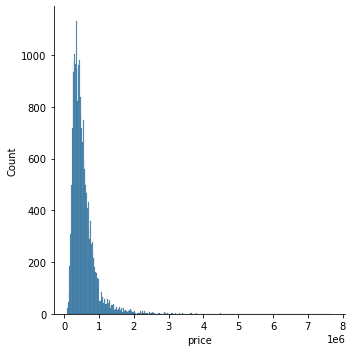

<Figure size 432x288 with 0 Axes>

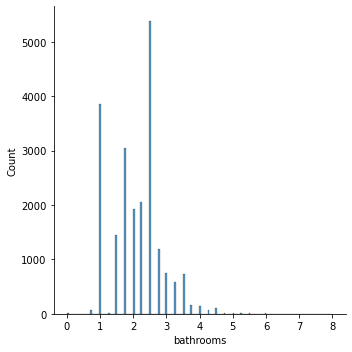

<Figure size 432x288 with 0 Axes>

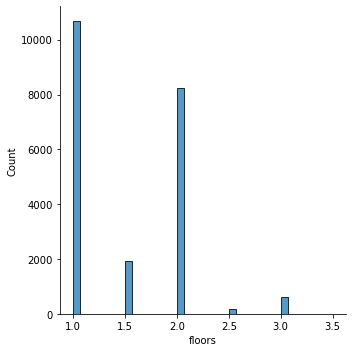

<Figure size 432x288 with 0 Axes>

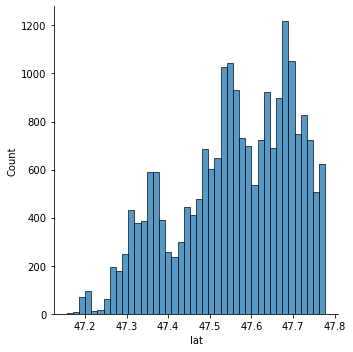

<Figure size 432x288 with 0 Axes>

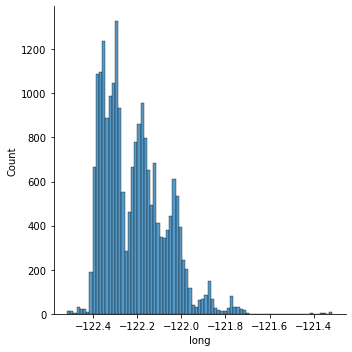

In [11]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.displot(df[col])

CHART COMMENTS

There is mostly only 1 apartment of all prices.
The bathrooms fluctuate between 1 and 3 per apartment.
Few apartments have more than 3, that is to say 4 bathrooms. The floors vary from 1 to 2 depending on the apartment, for the most part.

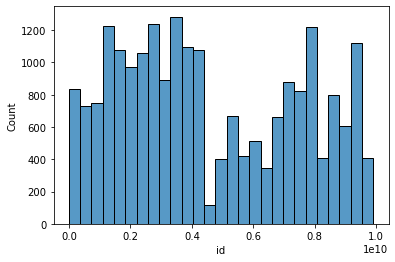

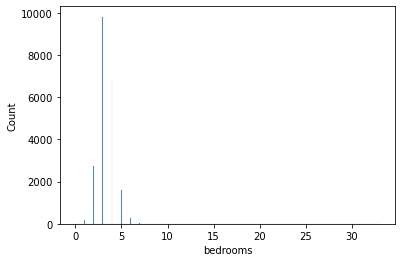

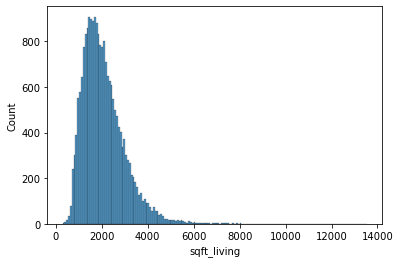

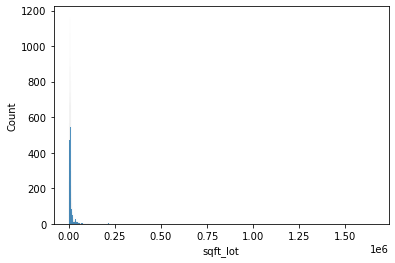

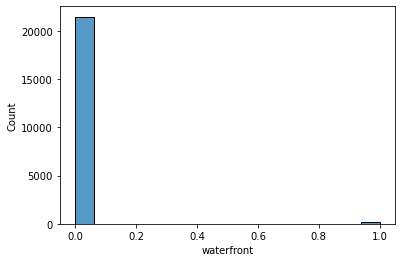

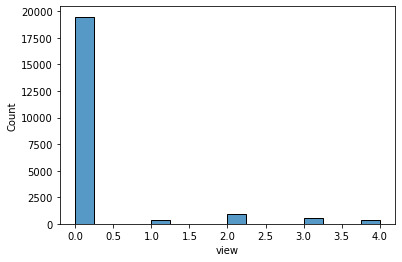

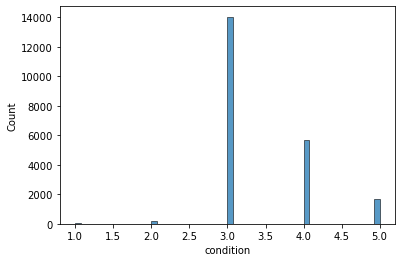

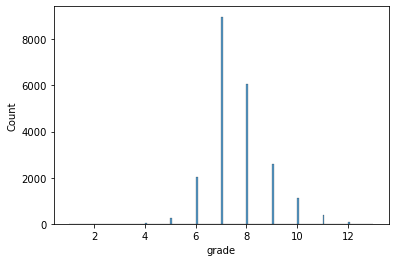

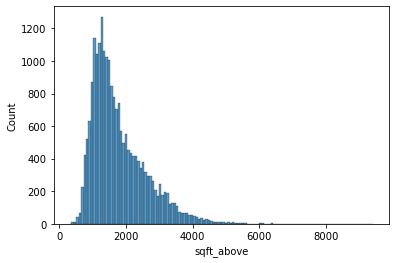

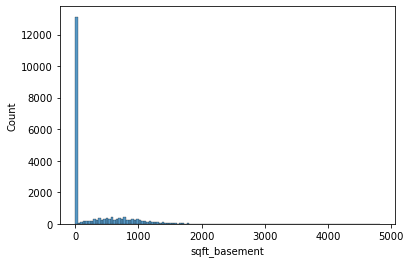

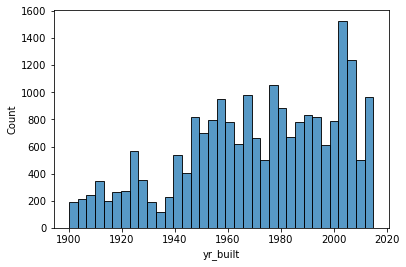

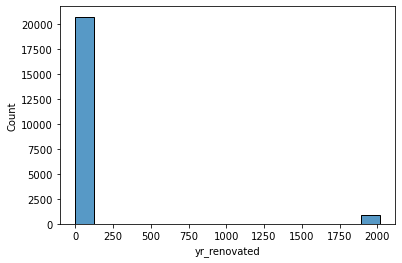

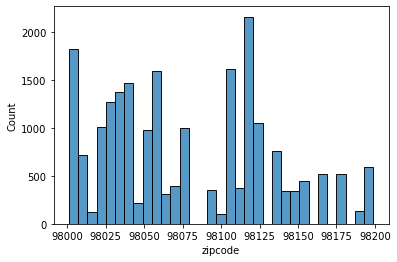

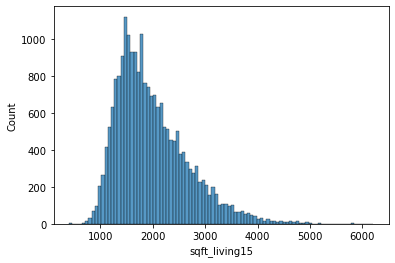

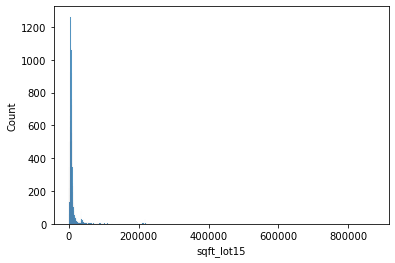

In [12]:
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.histplot(df[col])

COMMENTS ON GRAPHS

The rooms range from 1 to 5 depending on the apartments and their price.
We note that the area of the houses for the most part is 2000 m². Most of the apartments are of condition 3, others of conditions 4 and 5. The area of most of the apartments excluding basement is between 1000 and 2000 m². From 1940, apartments started to be built a lot.
The area of the living room in 2015 reached 2000 m² with renovations. There were not a few apartments with an area of 3000 m² in that year. And very few apartments with an area of 4000 m².

In [13]:
#2. Rédigez un paragraphe en sélectionnant les fonctionnalités les plus importantes (sélection des fonctionnalités). 

WRITING PARAGRAPHS FOR SELECTING IMPORTANT FEATURES

In [14]:
df.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

<AxesSubplot:>

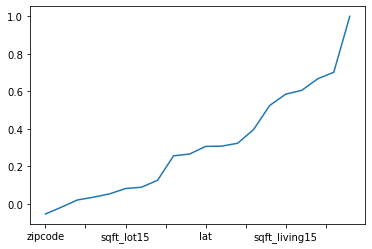

In [15]:
df.corr()['price'].sort_values().plot()

So we see that we have variables like sqft_living,grade,sqft_above,sqft_living15,bathrooms,floors waterfront,lat,bedrooms,sqft_basement,view,yr_renovated which have respective correlation percentages(0.702035,0.667434,0.605567,0.585379,0.525138,0.3972 ,0.323816,0.308350,0.307003,0.266369,0.256794,0.126434).
With such percentages, we can declare such features important.
This chart shows us a bit of the percentage correlation between price and other features

In [16]:
#3. Divisez votre ensemble de données en un ensemble d'apprentissage et un ensemble de test.

# Train Test Split

In [17]:
df1=df.drop(['zipcode','date','id','long','condition','yr_built','sqft_lot15','sqft_lot','price'],axis=1)
df2=df.drop(['id','date','condition','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15'],axis=1)

In [18]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(df1,df2,test_size=0.2)
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (17290, 12)
Test set: (4323, 12)


We have now split our data into 2 parts a Train set and a Test set. 80% of our data is in the Train set and 20% in the Test set

# Standardisation

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler= MinMaxScaler()
scaler.fit_transform(df1)
scaler.fit_transform(df2)

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

# Pipeline

In [24]:
#4-Application de la Régression Linéaire sur notre Train set

# Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

In [60]:
#5-Tracé de la Régression linéaire simple

# Simple Linear Regression

In [34]:
train_df,test_df = train_test_split(df,train_size=0.8,random_state=3)
x_train = np.array(train_df['sqft_living']).reshape(-1,1)
y_train = np.array(train_df['price']).reshape(-1,1)

In [36]:
x_test = np.array(test_df['sqft_living']).reshape(-1,1)
y_test = np.array(test_df['price']).reshape(-1,1)

In [37]:
modele= LinearRegression()

In [38]:
modele.fit(x_train,y_train)

LinearRegression()

In [42]:
modele.fit(x_train,y_train)

LinearRegression()

In [43]:
pred=modele.predict(x_test)

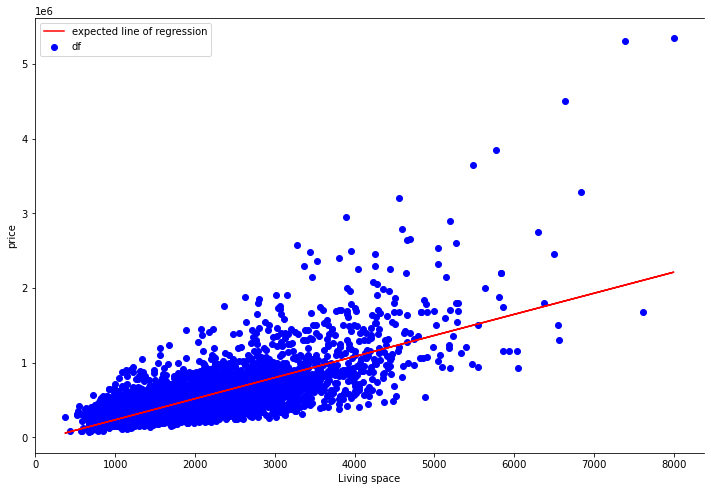

In [49]:
_,ax = plt.subplots(figsize=(12,8))
plt.scatter(x_test,y_test, color='blue',label='df')
plt.plot(x_test,modele.predict(x_test),color='red',label='expected line of regression')
plt.xlabel('Living space')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [51]:
#6-Mésure de la performance de la Régression Linéaire

In [50]:
modele.score(x_test,y_test)

0.4962393622495711

Our model has a performance or learning rate of 49.62%, that is to say almost 50%.

In [52]:
#7- Application de la Régression Multilinaéaire et comparaison au modèle linéaire

# Multilinear Regression

In [53]:
model= LinearRegression()

In [57]:
model.fit(X_train,Y_train)

LinearRegression()

In [58]:
predictions=model.predict(X_train)

In [59]:
model.score(X_test,Y_test)

0.6611425526380488

Our model has a performance rate of 66.61% almost 67%

# Comparison of our two previous models

We simply notice by observing our performance rates, the superiority of the multilinear model over the linear model.

In [63]:
#8-Application de la Régression Polynomiale

# Polynomial Regression

In [64]:
from sklearn.preprocessing import PolynomialFeatures

In [66]:
from sklearn.linear_model import LinearRegression

In [68]:
polyfeat = PolynomialFeatures(degree=2)
Xtrain_poly = polyfeat.fit_transform(X_train)
Xtest_poly = polyfeat.fit_transform(X_test)

poly = LinearRegression()
poly.fit(Xtrain_poly,train_df['price'])
polypred = poly.predict(Xtest_poly)

In [69]:
 poly.score(Xtest_poly,Y_test)

0.03322093783373281

Our model has a performance rate of 33.22%.

# Comparison of our three previous models

This model is much less appropriate compared to the previous ones given the performance rate it displays.